In [145]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [3]:
dataframe_df2 = pd.read_pickle("DataFrame_df2.pkl")
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]","[[ 0. 0. 29.0441583] Cd, [ 0. ..."
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [0. 2.06980071 4.36433..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],"[[0. 0. 9.5697] Ba, [0. 0. 5.6..."
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [7]:
dataframe_df2.columns

Index(['uuid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')

In [8]:
structures = list(dataframe_df2["PMG Structure from ASE Atoms"])
gridpoints = list(dataframe_df2.index)

In [9]:
features = {n:{} for n in gridpoints}
for name in gridpoints:
    features[name]["structure"]=dataframe_df2["PMG Structure from ASE Atoms"][name]

In [10]:
data=pd.DataFrame.from_dict(features).T
data

,structure
0,"[[ 0. 0. 29.0441583] Cd, [ 0. ..."
1,"[[0. 0. 0.] Fe, [0. 2.06980071 4.36433..."
2,"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,"[[0. 0. 9.5697] Ba, [0. 0. 5.6..."
4,"[[0. 2.414 1.49473] Ba, [2.414 0. ..."
...,...
2387,"[[0. 2.87064327 2.285 ] Li, [2.486..."
2388,"[[ 8.7759233 -1.51816627 6.20947541] K, [ 2...."
2389,"[[6.06416256 0.5661043 0.86358119] Li, [4.004..."
2390,"[[0. 0. 2.4314841] Sc, [ 0. ..."


In [16]:
data_small = data [data.index < 101]

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt
from matminer.datasets import load_dataset
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)
from matminer.featurizers.conversions import DictToObject
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import numpy as np

***SiteStatsFingerprint*** Computes statistics of properties across all sites in a structure. ---->

*This featurizer first uses a site featurizer class (see site.py for options) to compute features of each site in a structure, and then computes features of the entire structure by measuring statistics of each attribute. Can optionally compute the the statistics of only sites with certain ranges of oxidation states (e.g., only anions).*

***SiteStatsFingerprint.from_preset(“CoordinationNumber_ward-prb-2017”):*** describes the number of average and variance in the number of 1st nearest neighbors for each atom in the crystal:
https://journals.aps.org/prb/pdf/10.1103/PhysRevB.96.024104

***StructuralHeterogeneity:*** Variance in the bond lengths and atomic volumes in a structure

*These features are based on several statistics derived from the Voronoi tessellation of a structure. The first set of features relate to the variance in the average bond length across all atoms in the structure. The second relate to the variance of bond lengths between each neighbor of each atom. The final feature is the variance in Voronoi cell sizes across the structure.*
*We define the ‘average bond length’ of a site as the weighted average of the bond lengths for all neighbors. By default, the weight is the area of the face between the sites.*
*The ‘neighbor distance variation’ is defined as the weighted mean absolute deviation in both length for all neighbors of a particular site. As before, the weight is according to face area by default. For this statistic, we divide the mean absolute deviation by the mean neighbor distance for that site.*

***ChemicalOrdering:*** How much the ordering of species in the structure differs from random

*These parameters describe how much the ordering of all species in a structure deviates from random using a Warren-Cowley-like ordering parameter. The first step of this calculation is to determine the nearest neighbor shells of each site. Then, for each shell a degree of order for each type is determined by computing:*

$\alpha (t,s) = 1 - \frac{\sum_n w_n \delta (t - t_n)}{x_t \sum_n w_n}$

*where w_n is the weight associated with a certain neighbor, t_p is the type of the neighbor, and x_t is the fraction of type t in the structure. For atoms that are randomly dispersed in a structure, this formula yields 0 for all types. For structures where each site is surrounded only by atoms of another type, this formula yields large values of alpha.*

*The mean absolute value of this parameter across all sites is used as a feature.*

***MaximumPackingEfficiency:*** Maximum possible packing efficiency of this structure

*Uses a Voronoi tessellation to determine the largest radius each atom can have before any atoms touches any one of their neighbors. Given the maximum radius size, this class computes the maximum packing efficiency of the structure as a feature.*

***StructureComposition:*** Features related to the composition of a structure  ---->
***Stoichiometry:*** Calculate norms of stoichiometric attributes.
***ElementProperty:*** Class to calculate elemental property attributes.
***ValenceOrbital:*** Attributes of valence orbital shells
***IonProperty:*** Ionic property attributes. Similar to ElementProperty.

In [3]:
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    MaximumPackingEfficiency(),
    SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
    StructureComposition(Stoichiometry()),
    StructureComposition(ElementProperty.from_preset("magpie")),
    StructureComposition(ValenceOrbital(props=['frac'])),
    StructureComposition(IonProperty(fast=True))
])

***Something to learn and cite:***

In [17]:
print ('SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017") citation:', SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017").citations())
print ('\n')
print ('StructuralHeterogeneity', StructuralHeterogeneity().citations())
print ('\n')
print ('ChemicalOrdering citation:', ChemicalOrdering().citations())
print ('\n')
print ('MaximumPackingEfficiency()', MaximumPackingEfficiency().citations())
print ('\n')
print ('SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"):', SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017").citations())
print ('\n')
print ('StructureComposition(Stoichiometry()):', StructureComposition(Stoichiometry()).citations())
print ('\n')
print ('StructureComposition(ElementProperty.from_preset("magpie")):', StructureComposition(ElementProperty.from_preset("magpie")).citations())
print ('\n')
print ('StructureComposition(ValenceOrbital(props=[frac])):', StructureComposition(ValenceOrbital(props=['frac'])).citations())
print ('\n')
print ('StructureComposition(IonProperty(fast=True)):', StructureComposition(IonProperty(fast=True)).citations())

SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017") citation: ['@article{voronoi_jreineangewmath_1908, title={Nouvelles applications des param\\`{e}tres continus \\`{a} la th\'{e}orie des formes quadratiques. Sur quelques propri\'{e}t\'{e}s des formes quadratiques positives parfaites}, journal={Journal f"ur die reine und angewandte Mathematik}, number={133}, pages={97-178}, year={1908}}', '@article{dirichlet_jreineangewmath_1850, title={"{U}ber die Reduction der positiven quadratischen Formen mit drei unbestimmten ganzen Zahlen}, journal={Journal f"ur die reine und angewandte Mathematik}, number={40}, pages={209-227}, doi={10.1515/crll.1850.40.209}, year={1850}}']


StructuralHeterogeneity ['@article{Ward2017,author = {Ward, Logan and Liu, Ruoqian and Krishna, Amar and Hegde, Vinay I. and Agrawal, Ankit and Choudhary, Alok and Wolverton, Chris},doi = {10.1103/PhysRevB.96.024104},journal = {Physical Review B},pages = {024104},title = {{Including crystal structure attrib

In [14]:
dto = DictToObject(target_col_id='structure', overwrite_data=True)
data = dto.featurize_dataframe(data, 'structure')

DictToObject:   0%|          | 0/2392 [00:00<?, ?it/s]

***Let's featurize our datasets:***

In [45]:
%%time
X = featurizer.featurize_many(data['structure'], ignore_errors=True)

MultipleFeaturizer:   0%|          | 0/2392 [00:00<?, ?it/s]

CPU times: user 3.78 s, sys: 2.2 s, total: 5.98 s
Wall time: 1h 11min 28s


***Convert our generated features into DataFrame and add the label, and finally save it as pickle file***

In [ ]:
df_features = pd.DataFrame(X)
df_features.head()

In [ ]:
df = pd.concat([df_feature, y], axis = 1)

In [ ]:
df.to_pickle('features_MultipleFeaturizer.pkl')

In [75]:
df = pd.read_pickle("features_MultipleFeaturizer.pkl")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.777778,64.0,0.130435,0.217391,0.652174,0.000000,1.0,0.209607,0.046579,EE
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,73.333333,64.0,0.272727,0.454545,0.272727,0.000000,1.0,0.357395,0.079421,EE
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,15.750000,152.0,0.129032,0.193548,0.483871,0.193548,0.0,0.168813,0.031652,EE
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,28.000000,229.0,0.200000,0.000000,0.333333,0.466667,0.0,0.265103,0.058912,PE
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,65.555556,64.0,0.250000,0.250000,0.500000,0.000000,1.0,0.543070,0.104828,EE


**Number of features that are generated for each structure:**

In [82]:
X = np.array(df.drop('label', axis = 1))
print('Input data shape:', X.shape)

Input data shape: (2392, 273)


***Number of featurization that are failed:***

In [83]:
import pandas as pd
failed = np.any(pd.isnull(X), axis=1)
print('Number failed: {}/{}'.format(np.sum(failed), len(failed)))

Number failed: 179/2392


***Random Forest Classifier:***

In [84]:
model = Pipeline([
    ('imputer', SimpleImputer()), # For the failed structures
    ('model', RandomForestClassifier(n_estimators=150, n_jobs=-1))
])

In [85]:
y = df['label']

***Train Test Split***

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Train the model and predict:***

In [87]:
model.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model', RandomForestClassifier(n_estimators=150, n_jobs=-1))])

In [88]:
predictions = model.predict(X_test)

***Evaluation***

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          EE       0.84      0.85      0.84       341
         HBE       0.75      0.68      0.71       167
          PE       0.66      0.68      0.67       210

    accuracy                           0.76       718
   macro avg       0.75      0.74      0.74       718
weighted avg       0.76      0.76      0.76       718



[[290  16  35]
 [ 13 114  40]
 [ 44  23 143]]


***Let train in a binary case: EE and HBE***

In [91]:
df_binary = df.dropna()

In [92]:
df_binary.replace(to_replace='PE', value='EE', inplace=True)
df_binary.replace(to_replace='EE', value=1, inplace=True)
df_binary.replace(to_replace='HBE', value=0, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [93]:
df_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,label
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,73.333333,64.0,0.272727,0.454545,0.272727,0.000000,1.0,0.357395,0.079421,1
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,15.750000,152.0,0.129032,0.193548,0.483871,0.193548,0.0,0.168813,0.031652,1
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,28.000000,229.0,0.200000,0.000000,0.333333,0.466667,0.0,0.265103,0.058912,1
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,65.555556,64.0,0.250000,0.250000,0.500000,0.000000,1.0,0.543070,0.104828,1
5,4.297802,10.295063,5.997261,8.638179,1.860161,0.115771,1.081628,0.729867,6.790509e-02,0.240869,...,71.724490,12.0,0.181818,0.311688,0.324675,0.181818,1.0,0.400240,0.091499,1


In [94]:
X = df_binary.drop('label', axis = 1).values
y = df_binary['label'].values

In [134]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Logestic Regression***

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logmodel = LogisticRegression()

In [99]:
logmodel.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [100]:
predictions = logmodel.predict(X_test)

In [101]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.36      0.46       139
           1       0.85      0.94      0.89       525

    accuracy                           0.82       664
   macro avg       0.74      0.65      0.67       664
weighted avg       0.80      0.82      0.80       664



[[ 50  89]
 [ 30 495]]


***Decision Tree***

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
predictions = dtree.predict(X_test)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       139
           1       0.91      0.87      0.89       525

    accuracy                           0.83       664
   macro avg       0.74      0.76      0.75       664
weighted avg       0.84      0.83      0.83       664



[[ 91  48]
 [ 67 458]]


In [107]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31',
 'feature 32',
 'feature 33',
 'feature 34',
 'feature 35',
 'feature 36',
 'feature 37',
 'feature 38',
 'feature 39',
 'feature 40',
 'feature 41',
 'feature 42',
 'feature 43',
 'feature 44',
 'feature 45',
 'feature 46',
 'feature 47',
 'feature 48',
 'feature 49',
 'feature 50',
 'feature 51',
 'feature 52',
 'feature 53',
 'feature 54',
 'feature 55',
 'feature 56',
 'feature 57',
 'feature 58',
 'feature 59',
 'feature 60',
 'feature 61',
 'feature 62',
 'feature 63',
 'feature 64',
 'feature 65',
 'feature 66',
 'fea

In [108]:
dtree.feature_importances_

array([0.        , 0.05593222, 0.01554717, 0.01728938, 0.00800434,
       0.        , 0.01595667, 0.00914782, 0.06517984, 0.        ,
       0.        , 0.06679969, 0.        , 0.01373999, 0.03440006,
       0.02344072, 0.02274223, 0.00594262, 0.        , 0.        ,
       0.00304927, 0.        , 0.        , 0.        , 0.00779611,
       0.00086982, 0.        , 0.0098819 , 0.        , 0.        ,
       0.00711497, 0.        , 0.        , 0.027882  , 0.        ,
       0.00333514, 0.02629641, 0.00281471, 0.        , 0.        ,
       0.00177572, 0.        , 0.        , 0.        , 0.01533426,
       0.00284599, 0.01281631, 0.        , 0.        , 0.        ,
       0.        , 0.00603176, 0.00601889, 0.1258793 , 0.        ,
       0.        , 0.00667028, 0.00339578, 0.        , 0.        ,
       0.        , 0.0031128 , 0.        , 0.        , 0.01375185,
       0.00435543, 0.        , 0.00266811, 0.        , 0.        ,
       0.00266811, 0.        , 0.        , 0.        , 0.     

***Random Forest Model***

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
X_train.shape

(1549, 273)

In [111]:
RF = RandomForestClassifier(n_estimators=600)

In [112]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [113]:
pred_RF = RF.predict(X_test)

In [114]:
print(classification_report(y_test, pred_RF))
print("\n")
print(confusion_matrix(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66       139
           1       0.89      0.97      0.93       525

    accuracy                           0.88       664
   macro avg       0.87      0.76      0.80       664
weighted avg       0.88      0.88      0.87       664



[[ 76  63]
 [ 14 511]]


In [24]:
import shap

In [115]:
explainer = shap.Explainer(RF)
shap_values = explainer(X_train)

In [117]:
shap_values[0][:,1]

.values =
array([ 4.64810478e-04,  2.98899157e-03,  1.76648198e-03, -1.70873750e-03,
       -3.58756990e-06,  2.38742500e-03,  2.20509155e-03,  2.98369318e-03,
       -1.69536449e-03,  6.32673798e-04,  9.05750482e-04, -5.15009180e-03,
        2.67095674e-04,  2.14585719e-03,  1.86856202e-02,  7.17062560e-04,
       -1.14036942e-02,  4.31276253e-03,  3.16815718e-03,  2.38654940e-04,
        1.90489648e-04,  1.40061909e-03,  1.36634100e-04,  2.23971854e-03,
        2.38656756e-03,  6.62714406e-05,  1.74710057e-03,  2.22949920e-04,
        1.28306242e-03,  7.57206431e-04,  2.17731302e-04,  1.32966459e-03,
        5.18086796e-04,  1.59771344e-03,  1.14535729e-03,  3.00200495e-04,
        2.90622825e-03,  1.36390559e-03,  8.95456742e-04,  4.08626552e-03,
        3.66056686e-03,  9.64481537e-04,  2.95187103e-04,  4.41261599e-03,
        9.20721469e-05,  8.23049227e-05,  1.64375265e-03, -3.74369390e-04,
        2.27177927e-03,  1.47728151e-03,  5.49318363e-04,  2.32826166e-03,
        2.40464

In [118]:
y_train[0]

1

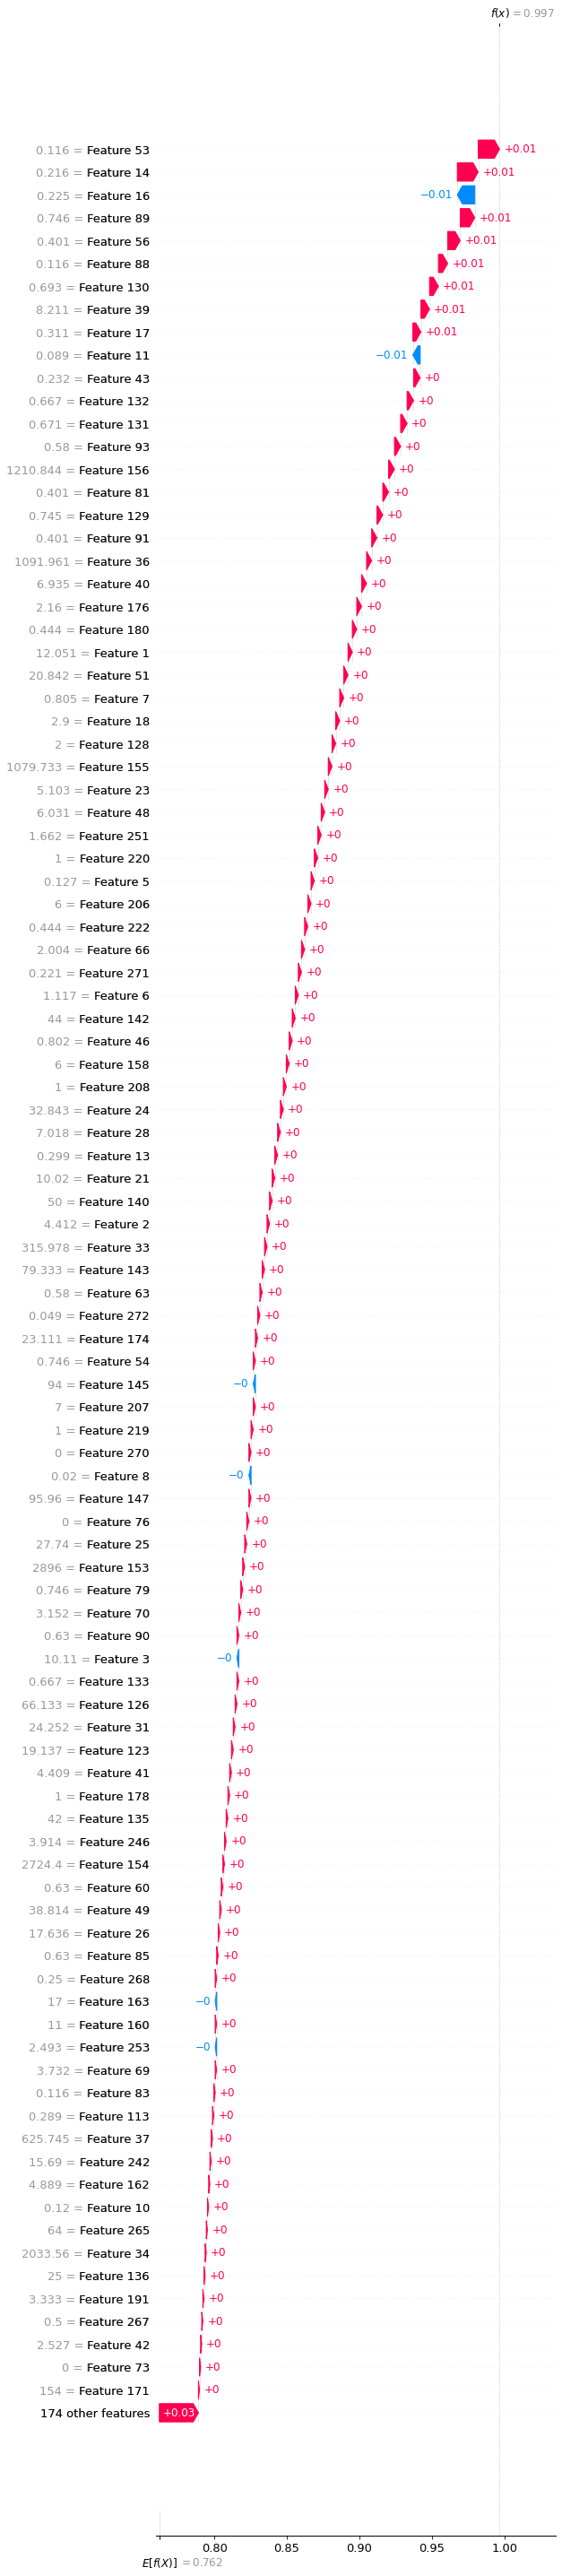

In [43]:
shap.plots.waterfall(shap_values[0][:,1], max_display=100)

In [47]:
shap.initjs()

In [48]:
shap.plots.force(shap_values[0][:,1])

In [53]:
shap.partial_dependence_plot(
    "new_personal_projection_delta", 
    model.predict, 
    X_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values_test[sample_ind:sample_ind+1,:]
)

NameError: name 'shap_values_test' is not defined

***Neural Network***

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [50]:
X.shape

(2213, 273)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [52]:
model = Sequential()

In [53]:
model.add(Dense(units=273,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
49/49 [==============================] - 1s 6ms/step - loss: 11.6191 - val_loss: 0.7178
Epoch 2/600
49/49 [==============================] - 0s 4ms/step - loss: 2.0232 - val_loss: 0.5974
Epoch 3/600
49/49 [==============================] - 0s 3ms/step - loss: 1.2389 - val_loss: 0.5388
Epoch 4/600
49/49 [==============================] - 0s 3ms/step - loss: 0.8616 - val_loss: 0.5001
Epoch 5/600
49/49 [==============================] - 0s 3ms/step - loss: 0.7395 - val_loss: 0.5350
Epoch 6/600
49/49 [==============================] - 0s 3ms/step - loss: 0.6679 - val_loss: 0.5768
Epoch 7/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5690 - val_loss: 0.5055
Epoch 8/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5561 - val_loss: 0.4887
Epoch 9/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5889 - val_loss: 0.4998
Epoch 10/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5653 - val_loss: 0.4812
Epoch 11

49/49 [==============================] - 0s 3ms/step - loss: 0.3778 - val_loss: 0.3533
Epoch 84/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3672 - val_loss: 0.3490
Epoch 85/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3723 - val_loss: 0.3876
Epoch 86/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3747 - val_loss: 0.3701
Epoch 87/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3535 - val_loss: 0.3443
Epoch 88/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3494 - val_loss: 0.3577
Epoch 89/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3380 - val_loss: 0.3570
Epoch 90/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3409 - val_loss: 0.3565
Epoch 91/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3341 - val_loss: 0.3560
Epoch 92/600
49/49 [==============================] - 0s 3ms/step - loss: 0.3375 - val_loss: 0.3483
Epoch 93/600


<AxesSubplot:>

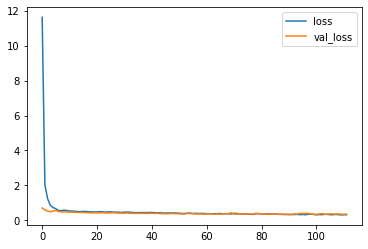

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [56]:
predictions = model.predict(X_test)

In [57]:
y_test.shape

(664,)

In [58]:
predictions = predictions.reshape(len(y_test))
predictions.shape

(664,)

In [59]:
pred = [round(i) for i in predictions]

In [60]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.34      0.48       139
           1       0.85      0.98      0.91       525

    accuracy                           0.85       664
   macro avg       0.84      0.66      0.70       664
weighted avg       0.85      0.85      0.82       664



[[ 47  92]
 [  9 516]]


***Remove features with Zero contribution based on dtree method***

In [173]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [130]:
dtree_importance = dtree.feature_importances_
features_zero = []
for i in range(len(dtree_importance)):
    if dtree_importance[i] == 0:
        features_zero.append(int(feature_names[i].split( )[1]))

***Creat the dataset removing features with zero contribution***

In [132]:
df_binary_removed_features_zero = df_binary.drop(features_zero, axis = 1)

In [133]:
X = df_binary_removed_features_zero.drop('label', axis = 1).values
y = df_binary_removed_features_zero['label'].values

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Neural Network***

In [137]:
X.shape

(2213, 84)

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [156]:
model = Sequential()

In [157]:
model.add(Dense(units=84,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=60,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [158]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
49/49 [==============================] - 1s 4ms/step - loss: 20.8757 - val_loss: 4.3565
Epoch 2/600
49/49 [==============================] - 0s 2ms/step - loss: 7.2377 - val_loss: 1.1811
Epoch 3/600
49/49 [==============================] - 0s 2ms/step - loss: 3.6313 - val_loss: 0.7460
Epoch 4/600
49/49 [==============================] - 0s 2ms/step - loss: 2.6367 - val_loss: 0.5568
Epoch 5/600
49/49 [==============================] - 0s 2ms/step - loss: 1.7769 - val_loss: 0.5784
Epoch 6/600
49/49 [==============================] - 0s 2ms/step - loss: 1.2875 - val_loss: 0.6529
Epoch 7/600
49/49 [==============================] - 0s 2ms/step - loss: 1.2334 - val_loss: 0.6018
Epoch 8/600
49/49 [==============================] - 0s 2ms/step - loss: 1.0343 - val_loss: 0.5645
Epoch 9/600
49/49 [==============================] - 0s 3ms/step - loss: 0.9678 - val_loss: 0.5438
Epoch 10/600
49/49 [==============================] - 0s 2ms/step - loss: 0.8479 - val_loss: 0.5406
Epoch 11

49/49 [==============================] - 0s 2ms/step - loss: 0.4955 - val_loss: 0.4311
Epoch 84/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4861 - val_loss: 0.4203
Epoch 85/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4736 - val_loss: 0.4456
Epoch 86/600
49/49 [==============================] - 0s 4ms/step - loss: 0.4816 - val_loss: 0.4190
Epoch 87/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4682 - val_loss: 0.4397
Epoch 88/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4755 - val_loss: 0.4352
Epoch 89/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4678 - val_loss: 0.4137
Epoch 90/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4792 - val_loss: 0.4330
Epoch 91/600
49/49 [==============================] - 0s 2ms/step - loss: 0.4717 - val_loss: 0.4313
Epoch 92/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4674 - val_loss: 0.4133
Epoch 93/600


<AxesSubplot:>

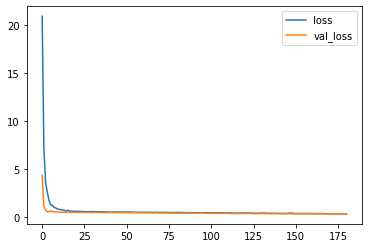

In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [160]:
predictions = model.predict(X_test)

In [162]:
predictions = predictions.reshape(len(y_test))
pred = [round(i) for i in predictions]

***Evaluation***

In [163]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.30      0.46       139
           1       0.84      0.99      0.91       525

    accuracy                           0.85       664
   macro avg       0.89      0.65      0.68       664
weighted avg       0.86      0.85      0.82       664



[[ 42  97]
 [  3 522]]


***Random Forest Method***

In [165]:
RF = RandomForestClassifier(n_estimators=600)

In [166]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [168]:
predictions = RF.predict(X_test)

In [170]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67       139
           1       0.89      0.97      0.93       525

    accuracy                           0.89       664
   macro avg       0.87      0.77      0.80       664
weighted avg       0.88      0.89      0.88       664



[[ 78  61]
 [ 15 510]]


***SHAP Technique to see features imapcts***

In [172]:
explainer = shap.Explainer(RF)
shap_values = explainer(X_train)

In [176]:
y_train[1]

0

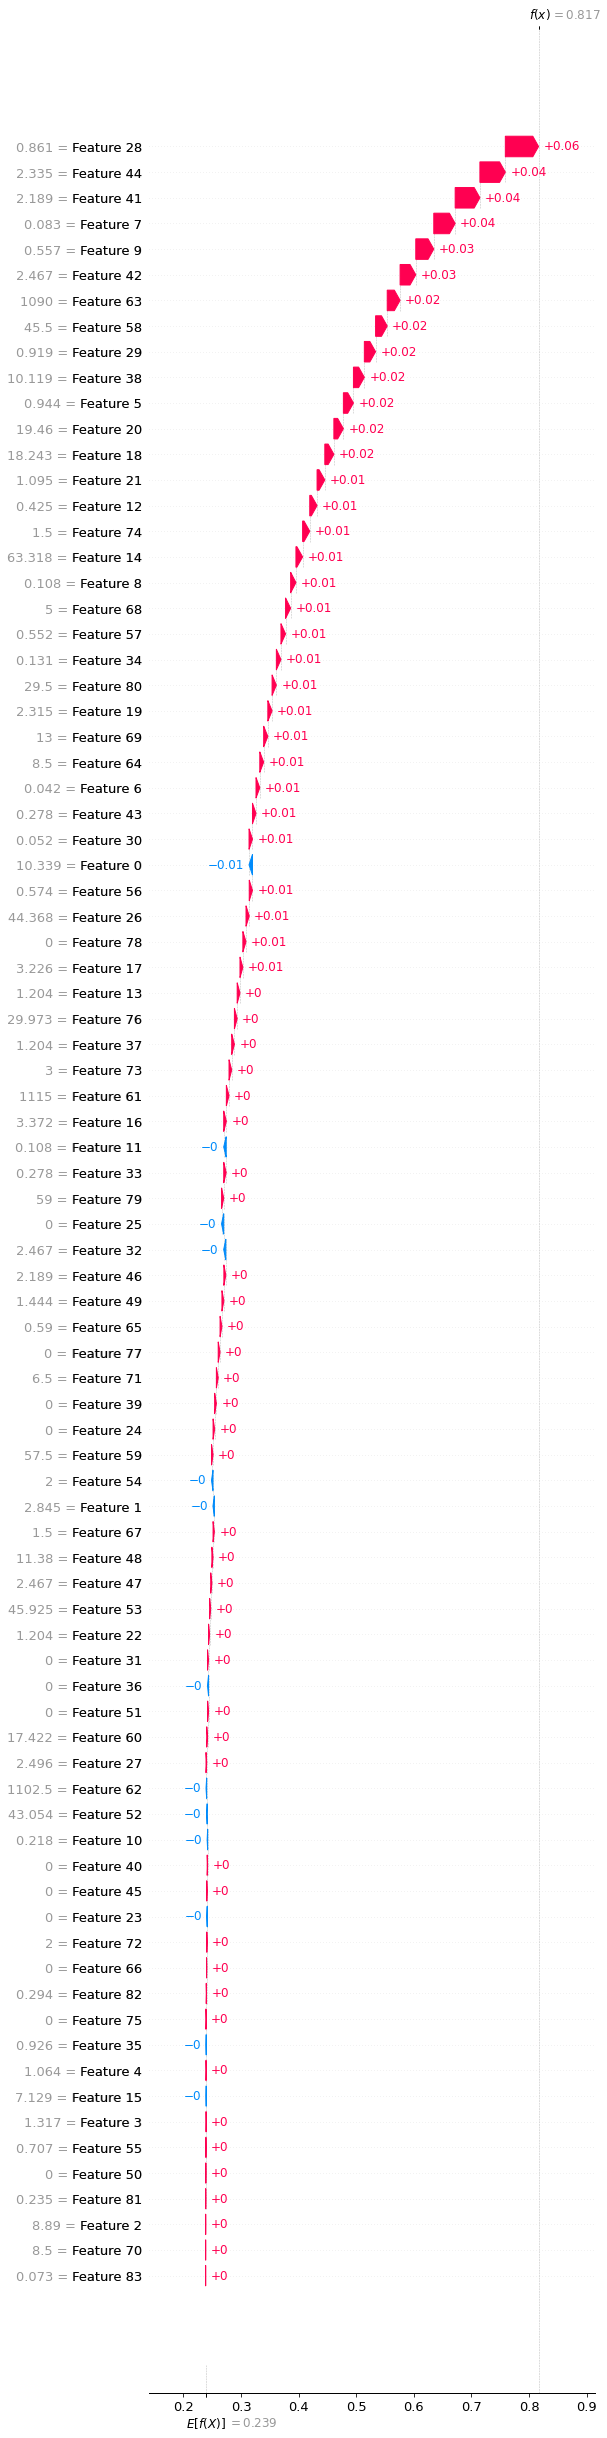

In [179]:
shap.plots.waterfall(shap_values[1][:,0], max_display=100)

In [191]:
shap.plots.force(shap_values[0][:, 0])